# Classical Mechanics I (PHYS 311)
## Studio 12

*Name: Evan Toon*

*Date: 11-7-2025*

## Driven Damped Harmonic Oscillators

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Last time you coded up a damped harmonic oscillator system. Let's simplify down to 1D, and now add a driving force.

Code up the differential equation for a 1D harmonic oscillator using `odeint` like we've done a few times in this class. But now include a frictional term **and a driving force $f(t)=f_0 cos(\omega_d t)$**. So your system of first-order ODEs should be:

$$\dot{v}_x = - 2\beta v_x - \omega_0^2 x + f_0 cos(\omega_d t)$$
$$\dot{x} = v_x$$

When you code this up, make $\beta$, $\omega_0$, $\omega_d$, and $f_0$ configurable arguments to your `ode_system` function (the same way we were handing it masses before).

In [20]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def ode_system(inputs, t, beta, omega_0, omega_d, f_0):

  x, vx = inputs
  xdot = vx
  vdot = -2 * beta * vx - (omega_0**2) * x + f_0 * np.cos((omega_d * t))
  return [xdot, vdot]

Let's **not** use animations this week **(so you don't need any `plotSomeStuff` function around!)**. Let's just plot the positions as a function of time. Basically, we're making the plots that I tried to (badly) draw on the board.

Plot for times from 0 to 50, in 200 steps.
Let's use $\beta=0.1$, $\omega_0=10$ (i.e. underdamped!).
To describe the driving force, use $f_0=1$, $\omega_d=1$ (below the resonance condition).
Start the system at the equilibrium position $x=0$ with no initial velocity.

**Comment on the result:** Do you see transients? Do you see a steady state behavior? What's the frequency and amplitude of the steady-state behavior? Roughly how long does it take to get to the steady state?

* Yes, the plot does include some transients at the beginning, but the oscillaions do reach a steady-state. The frequency of the steady-state behavior is ~ T = 1/6s = 0.167 Hz and the amplitude is ~ 0.010. It takes ~ 40 seconds to reach the steady-state

Text(0, 0.5, 'Position x(t)')

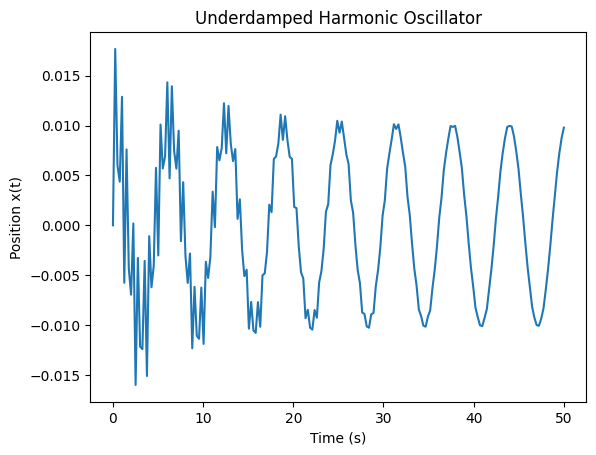

In [21]:
beta = 0.1
omega_0 = 10
f_0 = 1
omega_d = 1
initial_conditions = [0, 0]
t_array = np.linspace(0, 50, 200)

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))

x_array = solutions[:, 0]

plt.plot(t_array, x_array)
plt.title('Underdamped Harmonic Oscillator')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')

Change the starting position to 0.05, with no initial velocity. How long does it take to get to the steady state? Try with starting position of 1.

* It takes ~ 75 seconds for the $x_o$ = 0.05 case to reach the steady state, and it takes ~ 85 seconds for the $x_o$ = 1 case to reach the steady state

Text(0, 0.5, 'Position x(t)')

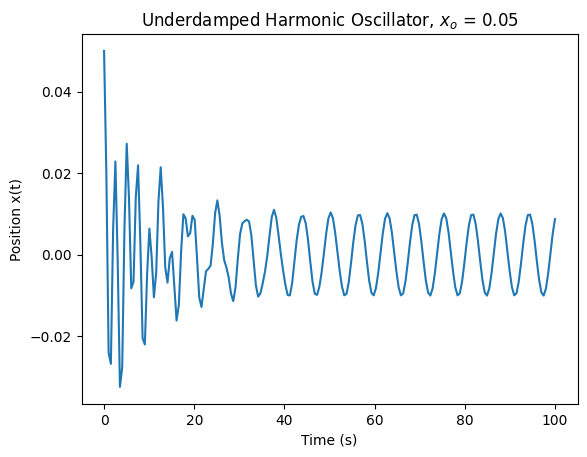

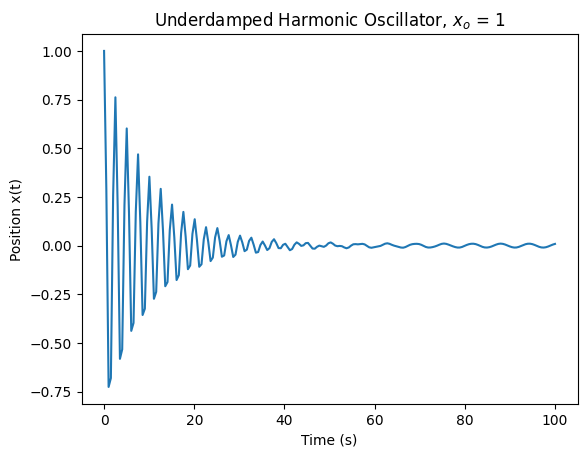

In [22]:
initial_conditions = [0.05, 0]
t_array = np.linspace(0,100, 200)   # <---- I changed the time to 0-100s to
                                    #       see when steady-state is reached

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))
x_array = solutions[:, 0]

plt.figure()
plt.plot(t_array, x_array)
plt.title('Underdamped Harmonic Oscillator, $x_o$ = 0.05')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')

initial_conditions = [1, 0]

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))
x_array = solutions[:, 0]

plt.figure()
plt.plot(t_array, x_array)
#plt.xlim(40,100)     # <--- Uncomment to easier see when
#plt.ylim(-0.1,0.1)   # <--- the steady state is reached
plt.title('Underdamped Harmonic Oscillator, $x_o$ = 1')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')

Now play with the parameters of the driving force. Demonstrate that you get the largest resulting amplitude when you drive an oscillator near its natural frequency by scanning various values of the driving frequencies.

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1019662224.py:15: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Underdamped Harmonic Oscillator, $\omega_d = 10$')


Text(0, 0.5, 'Position x(t)')

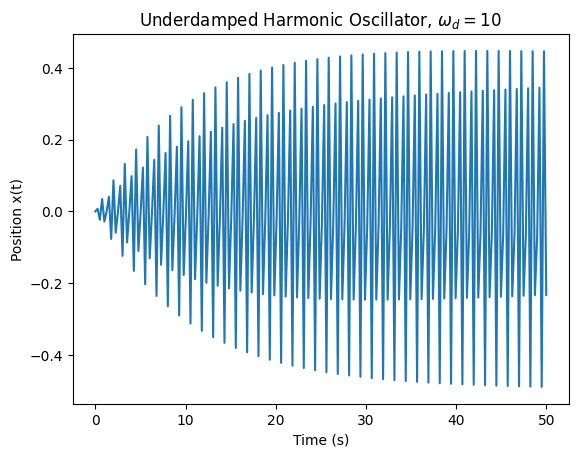

In [23]:
beta = 0.1
omega_0 = 10
f_0 = 1
omega_d = 10  # <--- After testing several values, setting omega_d equal to
              #      omega_0 result in the largest amplitudes of ~ 0.45.

initial_conditions = [0, 0]
t_array = np.linspace(0, 50, 200)

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))
x_array = solutions[:, 0]

plt.figure()
plt.plot(t_array, x_array)
plt.title('Underdamped Harmonic Oscillator, $\omega_d = 10$')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')

Plot the original driving force on some plots to compare the phase of the resulting motion. Show that well below resonance, the relative phase is 0, and well above it, the relative phase is $\pi$

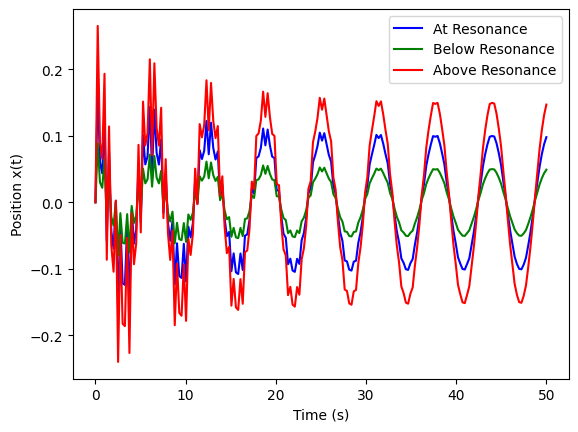

In [24]:
beta = 0.1
omega_0 = 10
f_0 = 10
omega_d = 1
initial_conditions = [0, 0]
t_array = np.linspace(0, 50, 200)

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))
x_array = solutions[:, 0]

plt.plot(t_array, x_array, label='At Resonance', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')
plt.legend()

#----------------------------------------------------------#

beta = 0.1
omega_0 = 10
f_0 = 5
omega_d = 1
initial_conditions = [0, 0]
t_array = np.linspace(0, 50, 200)

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))
x_array = solutions[:, 0]

plt.plot(t_array, x_array, label='Below Resonance', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')
plt.legend()

#----------------------------------------------------------#

beta = 0.1
omega_0 = 10
f_0 = 15
omega_d = 1
initial_conditions = [0, 0]
t_array = np.linspace(0, 50, 200)

solutions = odeint(ode_system, initial_conditions, t_array, args=(beta, omega_0, omega_d, f_0))
x_array = solutions[:, 0]

plt.plot(t_array, x_array, label='Above Resonance', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Position x(t)')
plt.legend()


**EC(+0.5): Figure out a way to calculate the phase offset between the steady-state behavior and the driving force. This will be a little tricky given the transients. Then plot the phase offset as a function of the driving frequency for a given oscillator. Show that when you have a nonzero damping, you get a smooth "turn-on" curve for the transition from $\delta=0$ to $\pi$**

<>:32: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1601270834.py:32: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Driving Frequncy, $\omega_d$')
/tmp/ipython-input-1601270834.py:33: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Phase Offset $\delta$ (rad)')


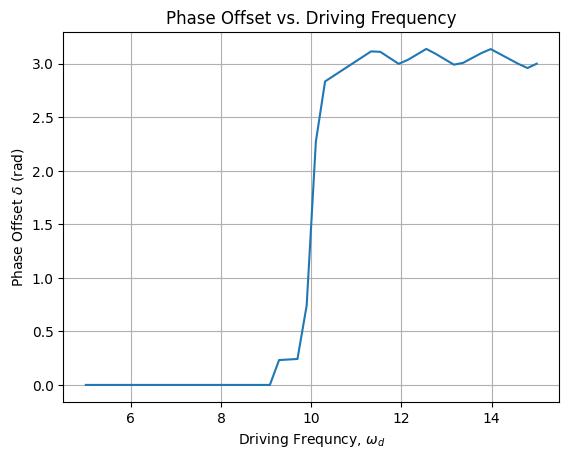

In [53]:
beta = 0.1
omega_0 = 10
f_0 = 1
x0 = [0,0]
t_array = np.linspace(0,100,4000)

omega_d_values = np.linspace(5,15,50)
phase_offsets = []

# Loops through each driving frequency value
for omega_d in omega_d_values:
    solutions = odeint(ode_system, x0, t_array, args=(beta, omega_0, omega_d, f_0))
    x_array = solutions[:,0]
    F_drive = f_0 * np.cos((omega_d * t_array))

    # Selects only the steady state section (ignores transients)
    steady = slice(len(t_array)//2, None)
    x_steady = x_array[steady]
    F_steady = F_drive[steady]
    t_steady = t_array[steady]

    # Computes the cross correlation to find the time lag
    corr = np.correlate(F_steady - np.mean(F_steady), x_steady - np.mean(x_steady), mode='full')
    lag_index = np.argmax(corr) - len(x_steady) + 1
    delta_t = lag_index * (t_array[1] - t_array[0])
    delta = (omega_d * delta_t) % (2*np.pi)
    if delta > np.pi:
      delta = 2*np.pi - delta
    phase_offsets.append(delta)

plt.plot(omega_d_values, phase_offsets)
plt.xlabel('Driving Frequncy, $\omega_d$')
plt.ylabel('Phase Offset $\delta$ (rad)')
plt.title('Phase Offset vs. Driving Frequency')
plt.grid(True)
plt.show()


